In [13]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Operator
import numpy as np

In [14]:
def uf(n, marked_elements):
    qc = QuantumCircuit(n)
    matrix = np.identity(2**n)
    for i in marked_elements:
        matrix[i,i] = -1
    qc.unitary(Operator(matrix),range(n))
    return qc

In [15]:
def V(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    qc.append(uf(n,[0]),range(n))
    for i in range(n):
        qc.h(i)
    return qc

In [16]:
def grover(n,marked):
    qc = QuantumCircuit(n,n)
    r = int(round(np.pi/(4*np.arcsin(1/np.sqrt(2**n))) - 1/2))
    for i in range(n):
        qc.h(i)
    for i in range(r):
        qc.append(uf(n,marked),range(n))
        qc.append(V(n),range(n))
    for i in range(n):
        qc.measure(i,i)
    return qc

In [39]:
n = 4
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while x == y:
    y = np.random.randint(2**n)
marked = [x,y]
qc = grover(n,marked)

qc.draw()
print(marked)

[9, 7]


{'0111': 176, '1100': 53, '0100': 49, '1001': 160, '0101': 48, '1101': 50, '1111': 52, '0010': 55, '0011': 37, '1010': 47, '0110': 53, '1000': 54, '0000': 53, '0001': 44, '1011': 49, '1110': 44}


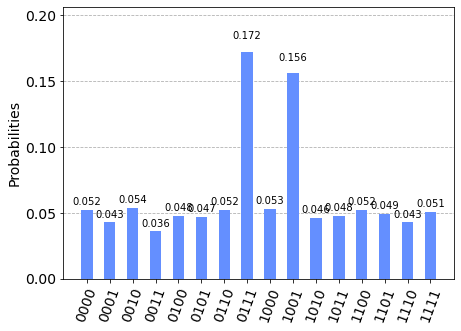

In [40]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc,backend=backend,shots=shots).result()
answer = results.get_counts(qc)
print(answer)
plot_histogram(answer)